jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

In [62]:
import networkx as nx
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import copy
import heapq
import math

In [5]:
df = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/project.csv', sep =';')
nameTable = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStation.csv', sep =';')

df.head(3)

,Station,Connection,Time
0,0,238,41.0
1,0,159,46.0
2,1,12,36.0


In [6]:
nameTable.head(3)

,indexStation,nameStation
0,0,Abbesses
1,1,Alexandre Dumas
2,2,Alma Marceau


In [7]:
MG = nx.MultiGraph()

In [8]:
for i in range(0, len(df.Station)):
    MG.add_edge(df.Station[i], df.Connection[i], weight=df.Time[i])

In [9]:
MG

In [10]:
print(MG.adj)

{0: {238: {0: {'weight': 41.0}, 1: {'weight': 41.0}}, 159: {0: {'weight': 46.0}, 1: {'weight': 46.0}}}, 238: {0: {0: {'weight': 41.0}, 1: {'weight': 41.0}}, 322: {0: {'weight': 27.0}, 1: {'weight': 27.0}}, 239: {0: {'weight': 120.0}, 1: {'weight': 120.0}}}, 159: {0: {0: {'weight': 46.0}, 1: {'weight': 46.0}}, 147: {0: {'weight': 44.0}, 1: {'weight': 44.0}}}, 1: {12: {0: {'weight': 36.0}, 1: {'weight': 36.0}}, 235: {0: {'weight': 44.0}, 1: {'weight': 44.0}}}, 12: {1: {0: {'weight': 36.0}, 1: {'weight': 36.0}}, 213: {0: {'weight': 42.0}, 1: {'weight': 42.0}}}, 235: {1: {0: {'weight': 44.0}, 1: {'weight': 44.0}}, 284: {0: {'weight': 44.0}, 1: {'weight': 44.0}}}, 2: {110: {0: {'weight': 69.0}, 1: {'weight': 69.0}}, 139: {0: {'weight': 50.0}, 1: {'weight': 50.0}}}, 110: {2: {0: {'weight': 69.0}, 1: {'weight': 69.0}}, 332: {0: {'weight': 37.0}, 1: {'weight': 37.0}}, 109: {0: {'weight': 120.0}, 1: {'weight': 120.0}}}, 139: {2: {0: {'weight': 50.0}, 1: {'weight': 50.0}}, 355: {0: {'weight': 46

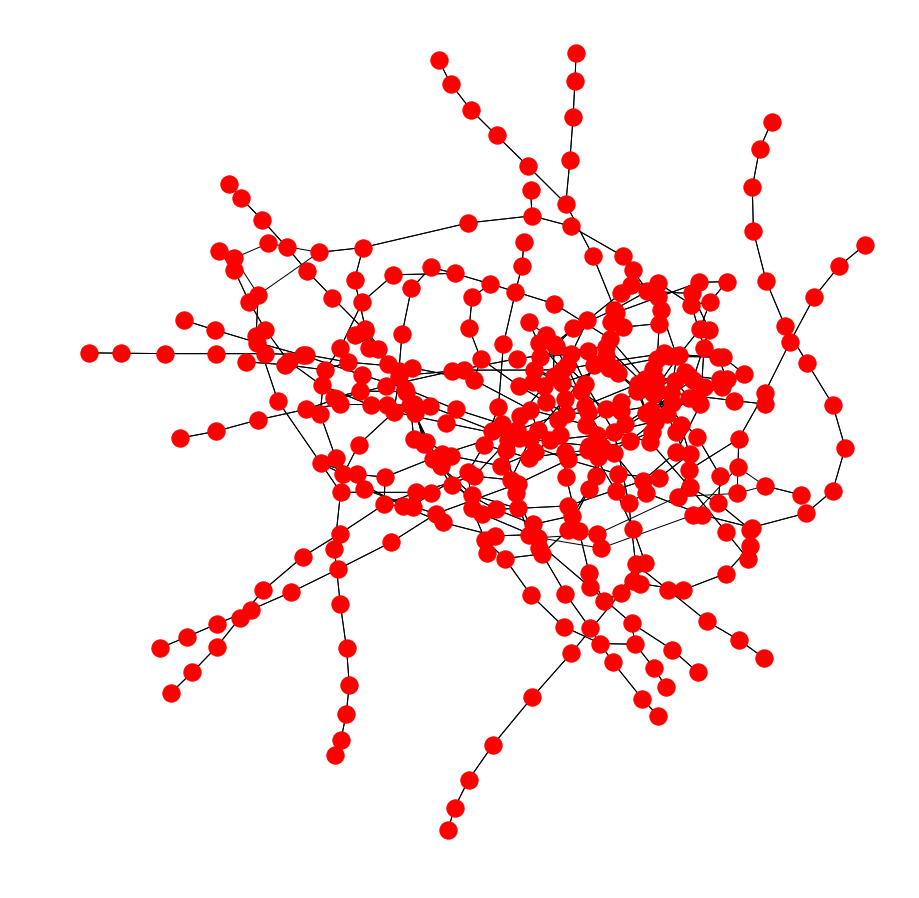

In [11]:

plt.figure(figsize=(12,12))
nx.draw(MG, label=False)

plt.show()

In [12]:
shortestMulti = nx.johnson(MG)

In [13]:
class Chromosome:
    def __init__(self, nodes):
        self.nodes = nodes       
    
    def shuffleGenes(self):
        random.shuffle(self.nodes)   
    
    #Order Changing Mutation, 1 gene is selected thanks to Pm probability then swapped with the other node(cant duplicate)
    def mutationGene(self, Pm):
        self.Pm = Pm
        for i in range(0, len(self.nodes)):
            self.randMutate = random.random()
            if self.randMutate < self.Pm:
                self.mutateTo = random.randint(0,len(self.nodes)-1)
                self.tmpGene = copy.copy(self.nodes[i])
                self.nodes = np.where(self.nodes == self.mutateTo, self.tmpGene, self.nodes)
                self.nodes[i] = self.mutateTo

    def pathWay(self, Multigraph): #Multigraph come from the Johnson Networkx calculation for shortest path between 2 nodes
        self.Multigraph = Multigraph
        self.totalPath = []
        for i in range(0, len(self.nodes)-1):        
            if i+1 is not None:
                self.totalPath = merge(self.totalPath, self.Multigraph[self.nodes[i]][self.nodes[i+1]])   
        return self.totalPath
        
    def __repr__(self):
        self.strNodes = "Chromosome :"
        for i in self.nodes:
            self.node = str(i)
            self.strNodes = self.strNodes + "|" + self.node
        self.strNodes = self.strNodes + "|"
        return self.strNodes

In [59]:
#Crossover PErmutation Encoding (1)ABC DEF + (2)DAB CFE --> ABC(1) DFE (in the order of the 2d chromosome genes)
def crossoverPermutation(chromo1, chromo2):
    lenChromo = int(len(chromo1.nodes) / 2)
    childrenChr = chromo1.nodes[0:lenChromo]
    for i in chromo2.nodes:
        if i not in childrenChr:
            childrenChr = np.append(childrenChr, [i])
    return childrenChr
    

In [60]:
def populationGenerationStart(popsize, nodeList, start):
    populationOpti = np.array([])
    for i in range(0,popsize,1):
        nodeList = np.unique(nodeList, axis=0)
        random.shuffle(nodeList)
        nodeList = np.where(nodeList == start, nodeList[0], nodeList)
        nodeList[0] = start
        populationOpti = np.append(populationOpti, Chromosome(nodeList))
    return populationOpti

In [40]:
def populationGenerationClassic(popsize, nodeList):
    populationOpti = []
    for i in range(0,popsize,1):
        nodeList = np.unique(nodeList, axis=0)
        random.shuffle(nodeList)
        populationOpti = populationOpti + [Chromosome(nodeList)]
    return populationOpti

In [16]:
#function can merge 2 list where last element of one(a) is the first element of the second(b)
#for example [1,2,3,4] + [4,5,6] = [1,2,3,4,5,6]
def merge(a, b):
    c = a[:-1] + b[:]
    return c
    

In [17]:
def fitnessScore(uniqueNodeList, chromosome, MultiG):
    fitScore = len(uniqueNodeList.unique()) / len(chromosome.pathWay(MultiG))
    return fitScore

In [20]:
def nameFit(uniqueNodeName, chromosome, MultiG):
    NameList = np.array([])
    for i in chromosome.pathWay(MultiG):
        NameList = np.append(NameList, uniqueNodeName[i])
    NameFreq = np.unique(NameList, return_counts=True)
    NameFreq = np.sort(NameFreq[1])
    score = 1 / np.sum((NameFreq[0:50]))
    return score

In [21]:
def nodesFit(chromosome, MultiG):
    score = 1 / len(chromosome.pathWay(MultiG))
    return score
    

In [72]:
def betweenNodesFit(chromFct, MG):
    scoreFinal = 0
    for i in range(0, len(chromFct.nodes)-1):
        if i+1 is not None:
            lenEdges = len(MG[chromFct.nodes[i]][chromFct.nodes[i+1]])
            scoreEdge = 1 / ((lenEdges)**2)
            scoreFinal = scoreEdge + scoreFinal
    return scoreFinal
            

In [ ]:
#MAIN LOOP
for mm in range(0,3):
    newPopulation = np.array([])
    for hh in range(0, 20):
        population = populationGenerationClassic(20, df.Station)
        print("Population iteration {}= {}".format(hh, population))
        for z in range(0,100):
            fitList = np.array([])
            for i in range(0,len(population)):
                fitList = np.append(fitList, fitnessScore(df.Station, population[i], shortestMulti))
            IndexfitBest = heapq.nlargest(10, range(len(fitList)), fitList.take)
            population_best = np.take(population, IndexfitBest)
            child = np.array([Chromosome(crossoverPermutation(population_best[0], population_best[9]))])
            for u in range(1, len(population_best)):
                crossChr = Chromosome(crossoverPermutation(population_best[u-1], population_best[u]))
                if crossChr not in child:
                    child = np.append(child, crossChr)
                else:
                    crossChr.mutationGene(0.2)
                    child = np.append(child, crossChr)
                    #child = np.append(child, Chromosome(df.Station).shuffleGenes())
            population = np.append(child, population_best)
            for mutIter in range(0, len(population)-1):
                rand = random.random()
                if rand < 0.2:
                    population[mutIter].mutationGene(0.1)
        print(fitList)
        bestChromoIter = population[1]
        newPopulation = np.append(newPopulation,bestChromoIter)
        print("newpop = ", newPopulation)
    population = newPopulation

print(newPopulation)

Population iteration 0= [Chromosome :|6|276|117|271|208|205|52|132|261|284|155|226|118|285|133|373|307|363|28|19|67|131|339|354|174|94|114|222|12|238|60|224|21|305|273|169|234|30|370|143|110|15|112|48|294|275|119|239|32|167|189|287|335|34|327|125|3|330|2|51|355|334|300|288|204|45|81|283|216|338|100|262|36|66|163|364|235|108|63|177|166|185|183|138|269|79|162|171|310|228|244|139|92|263|368|317|344|74|336|168|331|191|39|22|289|153|265|356|33|313|157|130|264|1|142|107|345|319|182|31|103|58|298|26|353|279|43|102|260|214|127|123|173|201|184|70|148|85|302|213|151|147|101|348|196|57|124|301|122|358|268|98|113|164|156|311|308|150|109|233|241|240|24|93|245|346|77|309|198|369|9|5|42|295|252|14|170|176|78|253|360|229|372|254|280|290|129|146|136|243|246|144|200|99|154|212|306|105|332|25|328|197|272|128|50|326|232|104|374|84|7|181|350|248|17|225|46|231|352|141|115|292|342|190|116|96|337|140|304|219|179|0|359|11|362|126|215|221|68|137|120|202|325|340|321|76|44|366|203|40|91|220|293|158|303|210|286|47

[0.07969479 0.07969479 0.07969479 0.07605178 0.07706497 0.07969479
 0.07969479 0.07662523 0.07969479 0.07969479 0.07969479 0.07969479
 0.07969479 0.07969479 0.07725498 0.07969479 0.07969479 0.07969479
 0.07969479 0.07969479]
newpop =  [Chromosome :|368|294|280|351|166|46|309|16|331|118|91|58|158|178|195|68|57|55|275|302|263|296|305|28|128|362|80|206|100|358|81|94|245|24|335|76|372|89|295|139|339|314|152|114|211|242|265|290|87|190|347|216|284|154|306|131|171|33|259|11|282|31|102|352|19|273|370|106|72|70|369|82|252|209|168|356|117|337|292|41|160|134|150|332|319|182|142|272|210|95|198|51|93|297|202|315|327|208|361|39|104|300|97|371|20|79|138|248|107|62|257|269|207|99|311|135|153|74|121|286|4|341|116|253|45|199|9|317|365|49|271|261|288|228|53|330|236|123|110|64|256|268|183|112|144|238|308|173|212|40|221|61|172|27|167|186|215|204|1|194|21|169|109|220|277|2|174|250|233|47|155|83|262|120|325|26|214|147|23|177|60|254|349|56|162|312|222|75|148|218|318|77|170|90|88|175|96|191|333|52|224|205|367|

[0.07959356 0.07959356 0.07959356 0.07959356 0.07959356 0.07959356
 0.07959356 0.07959356 0.07959356 0.07959356 0.07387033 0.0759596
 0.07959356 0.07920792 0.07959356 0.07959356 0.07959356 0.07684447
 0.07959356 0.07959356]
newpop =  [Chromosome :|368|294|280|351|166|46|309|16|331|118|91|58|158|178|195|68|57|55|275|302|263|296|305|28|128|362|80|206|100|358|81|94|245|24|335|76|372|89|295|139|339|314|152|114|211|242|265|290|87|190|347|216|284|154|306|131|171|33|259|11|282|31|102|352|19|273|370|106|72|70|369|82|252|209|168|356|117|337|292|41|160|134|150|332|319|182|142|272|210|95|198|51|93|297|202|315|327|208|361|39|104|300|97|371|20|79|138|248|107|62|257|269|207|99|311|135|153|74|121|286|4|341|116|253|45|199|9|317|365|49|271|261|288|228|53|330|236|123|110|64|256|268|183|112|144|238|308|173|212|40|221|61|172|27|167|186|215|204|1|194|21|169|109|220|277|2|174|250|233|47|155|83|262|120|325|26|214|147|23|177|60|254|349|56|162|312|222|75|148|218|318|77|170|90|88|175|96|191|333|52|224|205|367|3

[0.07739811 0.07499003 0.07861175 0.07861175 0.07861175 0.07861175
 0.07861175 0.07861175 0.07861175 0.07510987 0.07919124 0.07861175
 0.07861175 0.07861175 0.0764383  0.07861175 0.07861175 0.07861175
 0.07861175 0.07861175]
newpop =  [Chromosome :|368|294|280|351|166|46|309|16|331|118|91|58|158|178|195|68|57|55|275|302|263|296|305|28|128|362|80|206|100|358|81|94|245|24|335|76|372|89|295|139|339|314|152|114|211|242|265|290|87|190|347|216|284|154|306|131|171|33|259|11|282|31|102|352|19|273|370|106|72|70|369|82|252|209|168|356|117|337|292|41|160|134|150|332|319|182|142|272|210|95|198|51|93|297|202|315|327|208|361|39|104|300|97|371|20|79|138|248|107|62|257|269|207|99|311|135|153|74|121|286|4|341|116|253|45|199|9|317|365|49|271|261|288|228|53|330|236|123|110|64|256|268|183|112|144|238|308|173|212|40|221|61|172|27|167|186|215|204|1|194|21|169|109|220|277|2|174|250|233|47|155|83|262|120|325|26|214|147|23|177|60|254|349|56|162|312|222|75|148|218|318|77|170|90|88|175|96|191|333|52|224|205|367|

[0.07848048 0.07848048 0.07569962 0.07848048 0.07848048 0.07848048
 0.07848048 0.07848048 0.07848048 0.07848048 0.07848048 0.07848048
 0.07848048 0.07848048 0.07848048 0.07848048 0.07848048 0.07848048
 0.07848048 0.07848048]
newpop =  [Chromosome :|368|294|280|351|166|46|309|16|331|118|91|58|158|178|195|68|57|55|275|302|263|296|305|28|128|362|80|206|100|358|81|94|245|24|335|76|372|89|295|139|339|314|152|114|211|242|265|290|87|190|347|216|284|154|306|131|171|33|259|11|282|31|102|352|19|273|370|106|72|70|369|82|252|209|168|356|117|337|292|41|160|134|150|332|319|182|142|272|210|95|198|51|93|297|202|315|327|208|361|39|104|300|97|371|20|79|138|248|107|62|257|269|207|99|311|135|153|74|121|286|4|341|116|253|45|199|9|317|365|49|271|261|288|228|53|330|236|123|110|64|256|268|183|112|144|238|308|173|212|40|221|61|172|27|167|186|215|204|1|194|21|169|109|220|277|2|174|250|233|47|155|83|262|120|325|26|214|147|23|177|60|254|349|56|162|312|222|75|148|218|318|77|170|90|88|175|96|191|333|52|224|205|367|

[0.07830071 0.07830071 0.07830071 0.07830071 0.07623682 0.07830071
 0.07830071 0.07830071 0.07830071 0.07830071 0.07830071 0.07550201
 0.07830071 0.07830071 0.07830071 0.07562349 0.07830071 0.07830071
 0.07612877 0.07830071]
newpop =  [Chromosome :|368|294|280|351|166|46|309|16|331|118|91|58|158|178|195|68|57|55|275|302|263|296|305|28|128|362|80|206|100|358|81|94|245|24|335|76|372|89|295|139|339|314|152|114|211|242|265|290|87|190|347|216|284|154|306|131|171|33|259|11|282|31|102|352|19|273|370|106|72|70|369|82|252|209|168|356|117|337|292|41|160|134|150|332|319|182|142|272|210|95|198|51|93|297|202|315|327|208|361|39|104|300|97|371|20|79|138|248|107|62|257|269|207|99|311|135|153|74|121|286|4|341|116|253|45|199|9|317|365|49|271|261|288|228|53|330|236|123|110|64|256|268|183|112|144|238|308|173|212|40|221|61|172|27|167|186|215|204|1|194|21|169|109|220|277|2|174|250|233|47|155|83|262|120|325|26|214|147|23|177|60|254|349|56|162|312|222|75|148|218|318|77|170|90|88|175|96|191|333|52|224|205|367|

In [101]:
len(population_best[2].pathWay(shortestMulti))

4894

In [102]:
len(bestChromoIter.pathWay(shortestMulti))

4894

In [78]:
population

array([Chromosome :|316|313|262|359|241|286|2|73|165|278|324|96|76|189|222|263|257|70|307|152|150|374|29|255|46|187|328|275|133|240|269|355|88|290|56|190|201|220|231|74|104|321|131|226|371|28|18|16|86|185|265|22|137|128|40|121|65|299|37|122|45|230|109|112|69|281|99|83|191|147|180|130|60|310|243|184|283|293|144|27|138|250|186|79|332|346|239|182|266|291|129|364|119|136|90|91|106|360|287|62|242|227|159|253|25|193|68|325|87|300|5|311|31|338|192|337|80|6|55|52|39|19|362|323|213|59|181|71|271|345|235|41|140|268|272|12|176|216|365|280|11|233|353|103|143|132|352|288|199|349|225|372|1|162|177|139|97|348|285|3|24|164|318|105|234|273|236|214|212|366|124|115|135|315|333|334|298|120|154|203|30|309|33|344|343|113|169|63|373|354|0|246|335|314|171|141|308|218|7|363|101|161|92|95|358|356|284|368|50|188|94|329|204|26|44|175|210|254|32|53|126|237|274|228|306|61|351|21|42|77|301|178|174|340|292|251|163|13|166|217|322|151|296|260|336|47|117|295|244|4|108|78|58|223|326|158|370|339|341|107|114|75|125|170|142

In [34]:
np.unique(population[1].nodes)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [36]:
28 * 13

364